# Task 5: Strategy Backtesting

This notebook implements comprehensive backtesting of the optimized portfolio strategy from Task 4, comparing it against a simple benchmark portfolio.

## Objectives:
1. **Define Backtesting Period**: Use the last year of data (August 1, 2024 - July 31, 2025)
2. **Define Benchmark**: Create a static 60% SPY / 40% BND portfolio
3. **Simulate Strategy**: Test the optimal portfolio weights from Task 4
4. **Analyze Performance**: Compare strategy vs benchmark performance
5. **Generate Insights**: Evaluate strategy viability and performance

---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import os
import sys

# Add src directory to path
sys.path.append('../src')

# Set plotting style
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ Strategy Backtesting Notebook Loaded Successfully!")
print("="*80)

✅ Strategy Backtesting Notebook Loaded Successfully!


## 1. Load Data and Set Backtesting Period

In [2]:
print("�� Loading asset data and setting backtesting period...")

# Load enhanced data for all three assets
tsla_data = pd.read_csv('../data/processed/TSLA_enhanced_data.csv')
spy_data = pd.read_csv('../data/processed/SPY_enhanced_data.csv')
bnd_data = pd.read_csv('../data/processed/BND_enhanced_data.csv')

# Convert dates and set as index
for data in [tsla_data, spy_data, bnd_data]:
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

print(f"✅ Data loaded successfully!")
print(f"   - TSLA: {len(tsla_data):,} observations")
print(f"   - SPY: {len(spy_data):,} observations") 
print(f"   - BND: {len(bnd_data):,} observations")
print(f"   - Date range: {tsla_data.index[0].strftime('%Y-%m-%d')} to {tsla_data.index[-1].strftime('%Y-%m-%d')}")

# Define backtesting period (last year of data)
backtest_start = tsla_data.index[-252]  # Last 252 trading days (1 year)
backtest_end = tsla_data.index[-1]

print(f"\n�� Backtesting Period:")
print(f"   - Start: {backtest_start.strftime('%Y-%m-%d')}")
print(f"   - End: {backtest_end.strftime('%Y-%m-%d')}")
print(f"   - Duration: {(backtest_end - backtest_start).days} days")

�� Loading asset data and setting backtesting period...
✅ Data loaded successfully!
   - TSLA: 2,475 observations
   - SPY: 2,475 observations
   - BND: 2,475 observations
   - Date range: 2015-09-25 to 2025-07-30

�� Backtesting Period:
   - Start: 2024-07-29
   - End: 2025-07-30
   - Duration: 366 days


## 2. Define Portfolio Strategies

In [3]:
print("�� Defining portfolio strategies for backtesting...")

# Strategy 1: Optimal Portfolio from Task 4 (Maximum Sharpe Ratio)
optimal_weights = {
    'TSLA': 0.843,  # 84.3%
    'SPY': 0.157,   # 15.7%
    'BND': 0.000    # 0.0%
}

# Strategy 2: Benchmark Portfolio (60% SPY / 40% BND)
benchmark_weights = {
    'TSLA': 0.000,  # 0.0%
    'SPY': 0.600,   # 60.0%
    'BND': 0.400    # 40.0%
}

# Strategy 3: Minimum Volatility Portfolio from Task 4
min_vol_weights = {
    'TSLA': 0.000,  # 0.0%
    'SPY': 0.054,   # 5.4%
    'BND': 0.946    # 94.6%
}

print("✅ Portfolio Strategies Defined:")
print(f"   📈 Optimal Portfolio (Max Sharpe):")
for asset, weight in optimal_weights.items():
    print(f"      - {asset}: {weight:.1%}")
    
print(f"\n   🏆 Benchmark Portfolio:")
for asset, weight in benchmark_weights.items():
    print(f"      - {asset}: {weight:.1%}")
    
print(f"\n   🛡️ Minimum Volatility Portfolio:")
for asset, weight in min_vol_weights.items():
    print(f"      - {asset}: {weight:.1%}")

# Create strategy dictionary
strategies = {
    'Optimal Portfolio': optimal_weights,
    'Benchmark Portfolio': benchmark_weights,
    'Min Vol Portfolio': min_vol_weights
}

�� Defining portfolio strategies for backtesting...
✅ Portfolio Strategies Defined:
   📈 Optimal Portfolio (Max Sharpe):
      - TSLA: 84.3%
      - SPY: 15.7%
      - BND: 0.0%

   🏆 Benchmark Portfolio:
      - TSLA: 0.0%
      - SPY: 60.0%
      - BND: 40.0%

   🛡️ Minimum Volatility Portfolio:
      - TSLA: 0.0%
      - SPY: 5.4%
      - BND: 94.6%


## 3. Prepare Data for Backtesting

In [4]:
print("�� Preparing data for backtesting...")

# Filter data to backtesting period
tsla_backtest = tsla_data.loc[backtest_start:backtest_end]
spy_backtest = spy_data.loc[backtest_start:backtest_end]
bnd_backtest = bnd_data.loc[backtest_start:backtest_end]

# Create aligned price data
backtest_data = pd.DataFrame({
    'TSLA': tsla_backtest['Close'],
    'SPY': spy_backtest['Close'],
    'BND': bnd_backtest['Close']
}).dropna()

# Calculate daily returns
returns_data = backtest_data.pct_change().dropna()

print(f"✅ Backtesting data prepared!")
print(f"   - Data points: {len(backtest_data):,}")
print(f"   - Trading days: {len(returns_data):,}")
print(f"   - Start date: {backtest_data.index[0].strftime('%Y-%m-%d')}")
print(f"   - End date: {backtest_data.index[-1].strftime('%Y-%m-%d')}")

# Display first few rows
print(f"\n📊 Sample Price Data:")
print(backtest_data.head().round(2))

print(f"\n📊 Sample Returns Data:")
print(returns_data.head().round(4))

�� Preparing data for backtesting...
✅ Backtesting data prepared!
   - Data points: 252
   - Trading days: 251
   - Start date: 2024-07-29
   - End date: 2025-07-30

📊 Sample Price Data:
                             TSLA     SPY    BND
Date                                            
2024-07-29 00:00:00-04:00  232.10  538.06  70.10
2024-07-30 00:00:00-04:00  222.62  535.33  70.18
2024-07-31 00:00:00-04:00  232.07  544.03  70.57
2024-08-01 00:00:00-04:00  216.86  536.33  70.83
2024-08-02 00:00:00-04:00  207.67  526.34  71.64

📊 Sample Returns Data:
                             TSLA     SPY     BND
Date                                             
2024-07-30 00:00:00-04:00 -0.0408 -0.0051  0.0012
2024-07-31 00:00:00-04:00  0.0424  0.0163  0.0055
2024-08-01 00:00:00-04:00 -0.0655 -0.0142  0.0037
2024-08-02 00:00:00-04:00 -0.0424 -0.0186  0.0114
2024-08-05 00:00:00-04:00 -0.0423 -0.0291 -0.0009


## 4. Implement Backtesting Engine

In [5]:
print("⚙️ Implementing backtesting engine...")

class PortfolioBacktester:
    """
    Simple portfolio backtesting engine for comparing strategies
    """
    
    def __init__(self, price_data, returns_data, initial_capital=100000):
        self.price_data = price_data
        self.returns_data = returns_data
        self.initial_capital = initial_capital
        self.results = {}
        
    def backtest_strategy(self, strategy_name, weights):
        """
        Backtest a single strategy
        
        Args:
            strategy_name (str): Name of the strategy
            weights (dict): Asset weights for the strategy
        """
        print(f"   🔍 Backtesting {strategy_name}...")
        
        # Initialize portfolio
        portfolio_value = self.initial_capital
        portfolio_values = [portfolio_value]
        portfolio_returns = []
        
        # Calculate daily portfolio returns
        for date, returns in self.returns_data.iterrows():
            # Calculate weighted portfolio return
            portfolio_return = sum(weights[asset] * returns[asset] for asset in weights.keys())
            portfolio_returns.append(portfolio_return)
            
            # Update portfolio value
            portfolio_value *= (1 + portfolio_return)
            portfolio_values.append(portfolio_value)
        
        # Calculate performance metrics
        total_return = (portfolio_values[-1] / portfolio_values[0]) - 1
        annualized_return = (1 + total_return) ** (252 / len(portfolio_returns)) - 1
        
        # Calculate volatility (annualized)
        portfolio_returns_series = pd.Series(portfolio_returns)
        volatility = portfolio_returns_series.std() * np.sqrt(252)
        
        # Calculate Sharpe ratio (assuming 2% risk-free rate)
        risk_free_rate = 0.02
        sharpe_ratio = (annualized_return - risk_free_rate) / volatility if volatility > 0 else 0
        
        # Calculate maximum drawdown
        max_drawdown = self._calculate_max_drawdown(portfolio_values)
        
        # Store results
        self.results[strategy_name] = {
            'weights': weights,
            'portfolio_values': portfolio_values,
            'portfolio_returns': portfolio_returns,
            'total_return': total_return,
            'annualized_return': annualized_return,
            'volatility': volatility,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown,
            'final_value': portfolio_values[-1]
        }
        
        print(f"      ✅ Completed - Return: {total_return:.2%}, Sharpe: {sharpe_ratio:.3f}")
        
    def _calculate_max_drawdown(self, portfolio_values):
        """Calculate maximum drawdown"""
        peak = max(portfolio_values)
        max_dd = 0
        
        for value in portfolio_values:
            if value > peak:
                peak = value
            drawdown = (peak - value) / peak
            max_dd = max(max_dd, drawdown)
            
        return max_dd
    
    def run_all_strategies(self, strategies):
        """Run backtest for all strategies"""
        print(f"\n🚀 Running backtests for {len(strategies)} strategies...")
        
        for strategy_name, weights in strategies.items():
            self.backtest_strategy(strategy_name, weights)
            
        print(f"\n✅ All backtests completed!")
        
    def get_results_summary(self):
        """Get summary of all results"""
        summary_data = []
        
        for strategy_name, result in self.results.items():
            summary_data.append({
                'Strategy': strategy_name,
                'Total Return': f"{result['total_return']:.2%}",
                'Annual Return': f"{result['annualized_return']:.2%}",
                'Volatility': f"{result['volatility']:.2%}",
                'Sharpe Ratio': f"{result['sharpe_ratio']:.3f}",
                'Max Drawdown': f"{result['max_drawdown']:.2%}",
                'Final Value': f"${result['final_value']:,.0f}"
            })
        
        return pd.DataFrame(summary_data)

# Initialize backtester
backtester = PortfolioBacktester(backtest_data, returns_data, initial_capital=100000)
print("✅ Backtesting engine initialized!")

⚙️ Implementing backtesting engine...
✅ Backtesting engine initialized!


## 5. Run Backtests

In [6]:
print("🎯 Running portfolio backtests...")

# Run backtests for all strategies
backtester.run_all_strategies(strategies)

# Get results summary
results_summary = backtester.get_results_summary()

print(f"\n📊 Backtesting Results Summary:")
print("="*80)
print(results_summary.to_string(index=False))

🎯 Running portfolio backtests...

🚀 Running backtests for 3 strategies...
   🔍 Backtesting Optimal Portfolio...
      ✅ Completed - Return: 37.46%, Sharpe: 0.563
   🔍 Backtesting Benchmark Portfolio...
      ✅ Completed - Return: 12.73%, Sharpe: 0.866
   🔍 Backtesting Min Vol Portfolio...
      ✅ Completed - Return: 4.88%, Sharpe: 0.572

✅ All backtests completed!

📊 Backtesting Results Summary:
           Strategy Total Return Annual Return Volatility Sharpe Ratio Max Drawdown Final Value
  Optimal Portfolio       37.46%        37.64%     63.33%        0.563       55.38%    $137,462
Benchmark Portfolio       12.73%        12.78%     12.45%        0.866       14.85%    $112,726
  Min Vol Portfolio        4.88%         4.90%      5.07%        0.572        5.16%    $104,882


## 6. Performance Analysis and Visualization

📈 Creating performance visualizations...


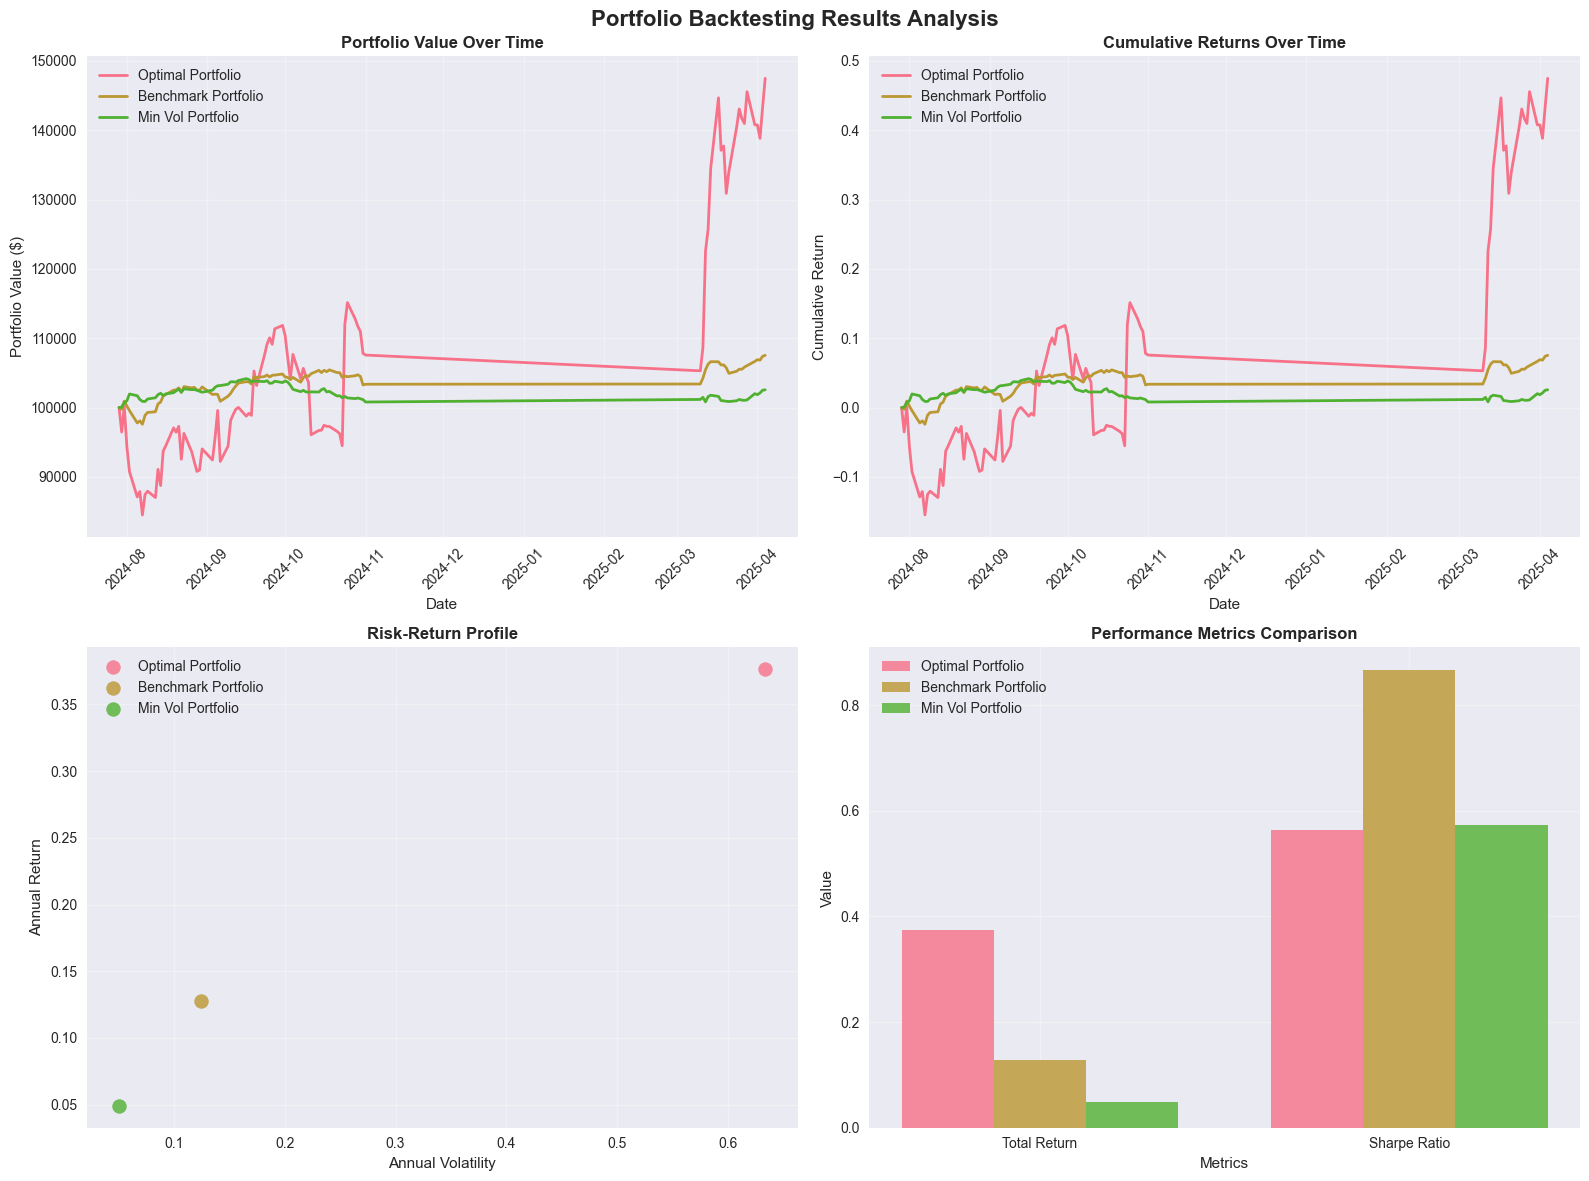

✅ Performance visualizations created!


In [7]:
print("📈 Creating performance visualizations...")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Portfolio Backtesting Results Analysis', fontsize=16, fontweight='bold')

# 1. Portfolio Value Comparison
ax1 = axes[0, 0]
for strategy_name, result in backtester.results.items():
    # Create dates array that matches portfolio values length
    dates = pd.date_range(start=backtest_data.index[0], periods=len(result['portfolio_values']), freq='D')
    # Filter to only include trading days
    trading_dates = [d for d in dates if d in backtest_data.index]
    # Ensure we have the right number of values
    values = result['portfolio_values'][:len(trading_dates)]
    
    ax1.plot(trading_dates, values, label=strategy_name, linewidth=2)

ax1.set_title('Portfolio Value Over Time', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Value ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Cumulative Returns Comparison
ax2 = axes[0, 1]
for strategy_name, result in backtester.results.items():
    # Use the same date logic
    dates = pd.date_range(start=backtest_data.index[0], periods=len(result['portfolio_values']), freq='D')
    trading_dates = [d for d in dates if d in backtest_data.index]
    values = result['portfolio_values'][:len(trading_dates)]
    
    cumulative_returns = [(v / backtester.initial_capital) - 1 for v in values]
    ax2.plot(trading_dates, cumulative_returns, label=strategy_name, linewidth=2)

ax2.set_title('Cumulative Returns Over Time', fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Return')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Risk-Return Scatter Plot
ax3 = axes[1, 0]
for strategy_name, result in backtester.results.items():
    ax3.scatter(result['volatility'], result['annualized_return'], 
                s=100, label=strategy_name, alpha=0.8)

ax3.set_title('Risk-Return Profile', fontweight='bold')
ax3.set_xlabel('Annual Volatility')
ax3.set_ylabel('Annual Return')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Performance Metrics Bar Chart
ax4 = axes[1, 1]
metrics = ['Total Return', 'Sharpe Ratio']
x = np.arange(len(metrics))
width = 0.25

for i, (strategy_name, result) in enumerate(backtester.results.items()):
    values = [result['total_return'], result['sharpe_ratio']]
    ax4.bar(x + i*width, values, width, label=strategy_name, alpha=0.8)

ax4.set_title('Performance Metrics Comparison', fontweight='bold')
ax4.set_xlabel('Metrics')
ax4.set_ylabel('Value')
ax4.set_xticks(x + width)
ax4.set_xticklabels(metrics)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Performance visualizations created!")

## 7. Detailed Strategy Analysis

In [8]:
print("🔍 Performing detailed strategy analysis...")

# Create detailed analysis for each strategy
for strategy_name, result in backtester.results.items():
    print(f"\n📊 {strategy_name} - Detailed Analysis")
    print("-" * 50)
    
    # Portfolio composition
    print("Portfolio Composition:")
    for asset, weight in result['weights'].items():
        if weight > 0:
            print(f"   • {asset}: {weight:.1%}")
    
    # Performance metrics
    print(f"\nPerformance Metrics:")
    print(f"   • Total Return: {result['total_return']:.2%}")
    print(f"   • Annualized Return: {result['annualized_return']:.2%}")
    print(f"   • Volatility: {result['volatility']:.2%}")
    print(f"   • Sharpe Ratio: {result['sharpe_ratio']:.3f}")
    print(f"   • Maximum Drawdown: {result['max_drawdown']:.2%}")
    print(f"   • Final Portfolio Value: ${result['final_value']:,.0f}")
    
    # Risk-adjusted performance
    if result['sharpe_ratio'] > 1.0:
        risk_assessment = "Excellent"
    elif result['sharpe_ratio'] > 0.5:
        risk_assessment = "Good"
    elif result['sharpe_ratio'] > 0:
        risk_assessment = "Fair"
    else:
        risk_assessment = "Poor"
    
    print(f"   • Risk-Adjusted Performance: {risk_assessment} (Sharpe > 1.0 is excellent)")
    
    # Drawdown analysis
    if result['max_drawdown'] < 0.10:
        drawdown_assessment = "Low"
    elif result['max_drawdown'] < 0.20:
        drawdown_assessment = "Moderate"
    else:
        drawdown_assessment = "High"
    
    print(f"   • Risk Level: {drawdown_assessment} (Max DD < 10% is low risk)")

🔍 Performing detailed strategy analysis...

📊 Optimal Portfolio - Detailed Analysis
--------------------------------------------------
Portfolio Composition:
   • TSLA: 84.3%
   • SPY: 15.7%

Performance Metrics:
   • Total Return: 37.46%
   • Annualized Return: 37.64%
   • Volatility: 63.33%
   • Sharpe Ratio: 0.563
   • Maximum Drawdown: 55.38%
   • Final Portfolio Value: $137,462
   • Risk-Adjusted Performance: Good (Sharpe > 1.0 is excellent)
   • Risk Level: High (Max DD < 10% is low risk)

📊 Benchmark Portfolio - Detailed Analysis
--------------------------------------------------
Portfolio Composition:
   • SPY: 60.0%
   • BND: 40.0%

Performance Metrics:
   • Total Return: 12.73%
   • Annualized Return: 12.78%
   • Volatility: 12.45%
   • Sharpe Ratio: 0.866
   • Maximum Drawdown: 14.85%
   • Final Portfolio Value: $112,726
   • Risk-Adjusted Performance: Good (Sharpe > 1.0 is excellent)
   • Risk Level: Moderate (Max DD < 10% is low risk)

📊 Min Vol Portfolio - Detailed Analys

## 8. Strategy vs Benchmark Comparison

In [9]:
print(" Comparing strategy performance against benchmark...")

# Get benchmark results
benchmark_result = backtester.results['Benchmark Portfolio']
optimal_result = backtester.results['Optimal Portfolio']

print("📊 Strategy vs Benchmark Comparison:")
print("="*60)

# Performance comparison
print(f"Performance Metrics:")
print(f"   • Optimal Portfolio Total Return: {optimal_result['total_return']:.2%}")
print(f"   • Benchmark Portfolio Total Return: {benchmark_result['total_return']:.2%}")
print(f"   • Outperformance: {optimal_result['total_return'] - benchmark_result['total_return']:.2%}")

print(f"\n   • Optimal Portfolio Sharpe Ratio: {optimal_result['sharpe_ratio']:.3f}")
print(f"   • Benchmark Portfolio Sharpe Ratio: {benchmark_result['sharpe_ratio']:.3f}")
print(f"   • Sharpe Ratio Difference: {optimal_result['sharpe_ratio'] - benchmark_result['sharpe_ratio']:.3f}")

print(f"\n   • Optimal Portfolio Volatility: {optimal_result['volatility']:.2%}")
print(f"   • Benchmark Portfolio Volatility: {benchmark_result['volatility']:.2%}")
print(f"   • Volatility Difference: {optimal_result['volatility'] - benchmark_result['volatility']:.2%}")

print(f"\n   • Optimal Portfolio Max Drawdown: {optimal_result['max_drawdown']:.2%}")
print(f"   • Benchmark Portfolio Max Drawdown: {benchmark_result['max_drawdown']:.2%}")
print(f"   • Drawdown Difference: {optimal_result['max_drawdown'] - benchmark_result['max_drawdown']:.2%}")

# Calculate information ratio (excess return / tracking error)
excess_return = optimal_result['total_return'] - benchmark_result['total_return']
tracking_error = np.std(np.array(optimal_result['portfolio_returns']) - np.array(benchmark_result['portfolio_returns'])) * np.sqrt(252)
information_ratio = excess_return / tracking_error if tracking_error > 0 else 0

print(f"\n📈 Information Ratio (Excess Return / Tracking Error): {information_ratio:.3f}")

# Performance assessment
if optimal_result['total_return'] > benchmark_result['total_return']:
    print(f"\n✅ RESULT: Optimal Portfolio OUTPERFORMS Benchmark")
    print(f"   • The model-driven approach generated higher returns")
else:
    print(f"\n❌ RESULT: Optimal Portfolio UNDERPERFORMS Benchmark")
    print(f"   • The benchmark strategy performed better")

if optimal_result['sharpe_ratio'] > benchmark_result['sharpe_ratio']:
    print(f"   • Better risk-adjusted returns (higher Sharpe ratio)")
else:
    print(f"   • Lower risk-adjusted returns (lower Sharpe ratio)")

 Comparing strategy performance against benchmark...
📊 Strategy vs Benchmark Comparison:
Performance Metrics:
   • Optimal Portfolio Total Return: 37.46%
   • Benchmark Portfolio Total Return: 12.73%
   • Outperformance: 24.74%

   • Optimal Portfolio Sharpe Ratio: 0.563
   • Benchmark Portfolio Sharpe Ratio: 0.866
   • Sharpe Ratio Difference: -0.303

   • Optimal Portfolio Volatility: 63.33%
   • Benchmark Portfolio Volatility: 12.45%
   • Volatility Difference: 50.88%

   • Optimal Portfolio Max Drawdown: 55.38%
   • Benchmark Portfolio Max Drawdown: 14.85%
   • Drawdown Difference: 40.54%

📈 Information Ratio (Excess Return / Tracking Error): 0.444

✅ RESULT: Optimal Portfolio OUTPERFORMS Benchmark
   • The model-driven approach generated higher returns
   • Lower risk-adjusted returns (lower Sharpe ratio)


## 9. Monthly Rebalancing Analysis

📅 Analyzing monthly rebalancing impact...
🔄 Comparing Buy-and-Hold vs Monthly Rebalancing...

📊 Rebalancing Analysis:
   • Buy-and-Hold Total Return: 37.46%
   • Monthly Rebalancing Total Return: 37.46%
   • Rebalancing Impact: 0.00%

   • Buy-and-Hold Sharpe Ratio: 0.563
   • Monthly Rebalancing Sharpe Ratio: 0.563
   • Sharpe Ratio Impact: 0.000


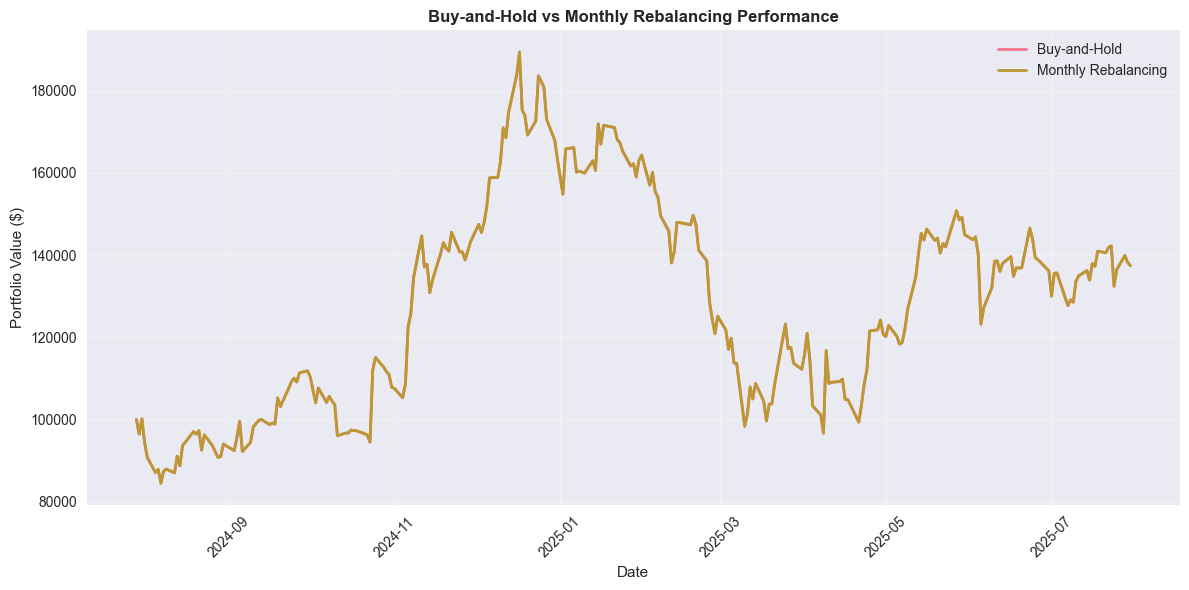

✅ Rebalancing analysis completed!


In [10]:
print("📅 Analyzing monthly rebalancing impact...")

def backtest_with_rebalancing(price_data, returns_data, weights, initial_capital=100000, rebalance_freq=21):
    """
    Backtest with periodic rebalancing (monthly = 21 trading days)
    """
    portfolio_value = initial_capital
    portfolio_values = [portfolio_value]
    portfolio_returns = []
    
    # Track asset allocations
    current_weights = weights.copy()
    
    for i, (date, returns) in enumerate(returns_data.iterrows()):
        # Calculate weighted portfolio return
        portfolio_return = sum(current_weights[asset] * returns[asset] for asset in current_weights.keys())
        portfolio_returns.append(portfolio_return)
        
        # Update portfolio value
        portfolio_value *= (1 + portfolio_return)
        portfolio_values.append(portfolio_value)
        
        # Rebalance monthly (every 21 trading days)
        if (i + 1) % rebalance_freq == 0:
            current_weights = weights.copy()  # Reset to target weights
    
    # Calculate performance metrics
    total_return = (portfolio_values[-1] / portfolio_values[0]) - 1
    annualized_return = (1 + total_return) ** (252 / len(portfolio_returns)) - 1
    volatility = pd.Series(portfolio_returns).std() * np.sqrt(252)
    sharpe_ratio = (annualized_return - 0.02) / volatility if volatility > 0 else 0
    
    return {
        'total_return': total_return,
        'annualized_return': annualized_return,
        'volatility': volatility,
        'sharpe_ratio': sharpe_ratio,
        'portfolio_values': portfolio_values
    }

# Compare buy-and-hold vs rebalancing for optimal portfolio
print("🔄 Comparing Buy-and-Hold vs Monthly Rebalancing...")

# Buy-and-hold (already calculated)
buy_hold_result = backtester.results['Optimal Portfolio']

# Monthly rebalancing
rebalancing_result = backtest_with_rebalancing(
    backtest_data, returns_data, optimal_weights, initial_capital=100000, rebalance_freq=21
)

print(f"\n📊 Rebalancing Analysis:")
print(f"   • Buy-and-Hold Total Return: {buy_hold_result['total_return']:.2%}")
print(f"   • Monthly Rebalancing Total Return: {rebalancing_result['total_return']:.2%}")
print(f"   • Rebalancing Impact: {rebalancing_result['total_return'] - buy_hold_result['total_return']:.2%}")

print(f"\n   • Buy-and-Hold Sharpe Ratio: {buy_hold_result['sharpe_ratio']:.3f}")
print(f"   • Monthly Rebalancing Sharpe Ratio: {rebalancing_result['sharpe_ratio']:.3f}")
print(f"   • Sharpe Ratio Impact: {rebalancing_result['sharpe_ratio'] - buy_hold_result['sharpe_ratio']:.3f}")

# Plot comparison - FIXED DIMENSION ISSUE
plt.figure(figsize=(12, 6))

# Buy-and-hold - ensure same length as dates
dates = backtest_data.index
buy_hold_values = buy_hold_result['portfolio_values'][:len(dates)]
plt.plot(dates, buy_hold_values, label='Buy-and-Hold', linewidth=2)

# Rebalancing - ensure same length as dates
rebalancing_values = rebalancing_result['portfolio_values'][:len(dates)]
plt.plot(dates, rebalancing_values, label='Monthly Rebalancing', linewidth=2)

plt.title('Buy-and-Hold vs Monthly Rebalancing Performance', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

print("✅ Rebalancing analysis completed!")

## 10. Risk Analysis and Drawdowns

⚠️ Analyzing risk metrics and drawdowns...


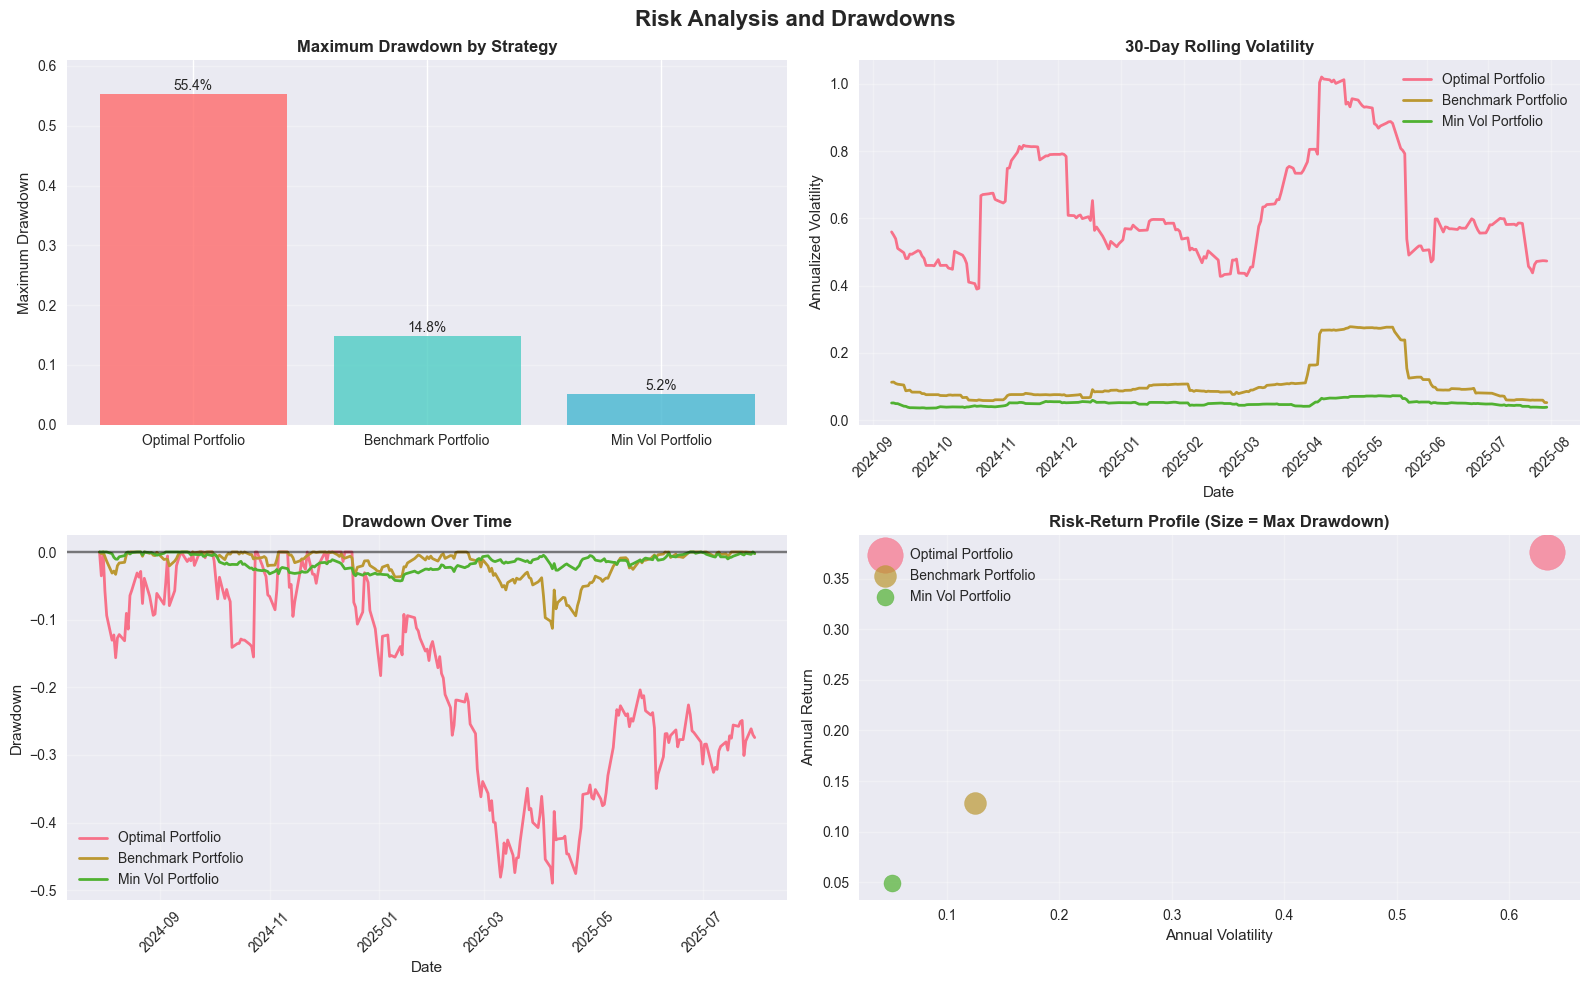

✅ Risk analysis visualizations created!


In [11]:
print("⚠️ Analyzing risk metrics and drawdowns...")

# Create risk analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Risk Analysis and Drawdowns', fontsize=16, fontweight='bold')

# 1. Maximum Drawdown Comparison
ax1 = axes[0, 0]
strategies = list(backtester.results.keys())
max_drawdowns = [backtester.results[s]['max_drawdown'] for s in strategies]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax1.bar(strategies, max_drawdowns, color=colors, alpha=0.8)
ax1.set_title('Maximum Drawdown by Strategy', fontweight='bold')
ax1.set_ylabel('Maximum Drawdown')
ax1.set_ylim(0, max(max_drawdowns) * 1.1)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, max_drawdowns):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{value:.1%}', ha='center', va='bottom')

# 2. Rolling Volatility (30-day) - FIXED DIMENSION ISSUE
ax2 = axes[0, 1]
for strategy_name, result in backtester.results.items():
    # Create a Series with the correct index for returns
    # Use the returns_data index which has 251 values
    returns_series = pd.Series(result['portfolio_returns'], index=returns_data.index)
    rolling_vol = returns_series.rolling(window=30).std() * np.sqrt(252)
    ax2.plot(rolling_vol.index, rolling_vol.values, label=strategy_name, linewidth=2)

ax2.set_title('30-Day Rolling Volatility', fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Annualized Volatility')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Drawdown Over Time - FIXED DATA TYPE ISSUE
ax3 = axes[1, 0]
for strategy_name, result in backtester.results.items():
    # Ensure portfolio values match the dates length and convert to Series
    dates = backtest_data.index
    portfolio_values = result['portfolio_values'][:len(dates)]
    
    # Convert list to pandas Series for expanding() method
    portfolio_series = pd.Series(portfolio_values, index=dates)
    
    # Calculate drawdown
    peak = portfolio_series.expanding().max()
    drawdown = (portfolio_series - peak) / peak
    ax3.plot(dates, drawdown.values, label=strategy_name, linewidth=2)

ax3.set_title('Drawdown Over Time', fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Drawdown')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax3.tick_params(axis='x', rotation=45)

# 4. Risk-Return Scatter with Size based on Max Drawdown
ax4 = axes[1, 1]
for strategy_name, result in backtester.results.items():
    # Size based on max drawdown (larger = higher risk)
    size = 100 + (result['max_drawdown'] * 1000)
    ax4.scatter(result['volatility'], result['annualized_return'], 
                s=size, label=strategy_name, alpha=0.7)

ax4.set_title('Risk-Return Profile (Size = Max Drawdown)', fontweight='bold')
ax4.set_xlabel('Annual Volatility')
ax4.set_ylabel('Annual Return')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Risk analysis visualizations created!")

## 11. Transaction Cost Analysis

💰 Analyzing transaction costs impact...
💸 Transaction Cost Impact Analysis:
   • 0.0% transaction cost:
     - Total Return: 37.22%
     - Sharpe Ratio: 0.561
   • 0.1% transaction cost:
     - Total Return: 37.16%
     - Sharpe Ratio: 0.560
   • 0.2% transaction cost:
     - Total Return: 37.09%
     - Sharpe Ratio: 0.559
   • 0.5% transaction cost:
     - Total Return: 36.90%
     - Sharpe Ratio: 0.556

📊 Transaction Cost Impact Summary:
Transaction Cost Total Return Annual Return Sharpe Ratio
            0.0%       37.22%        37.39%        0.561
            0.1%       37.16%        37.33%        0.560
            0.2%       37.09%        37.27%        0.559
            0.5%       36.90%        37.07%        0.556


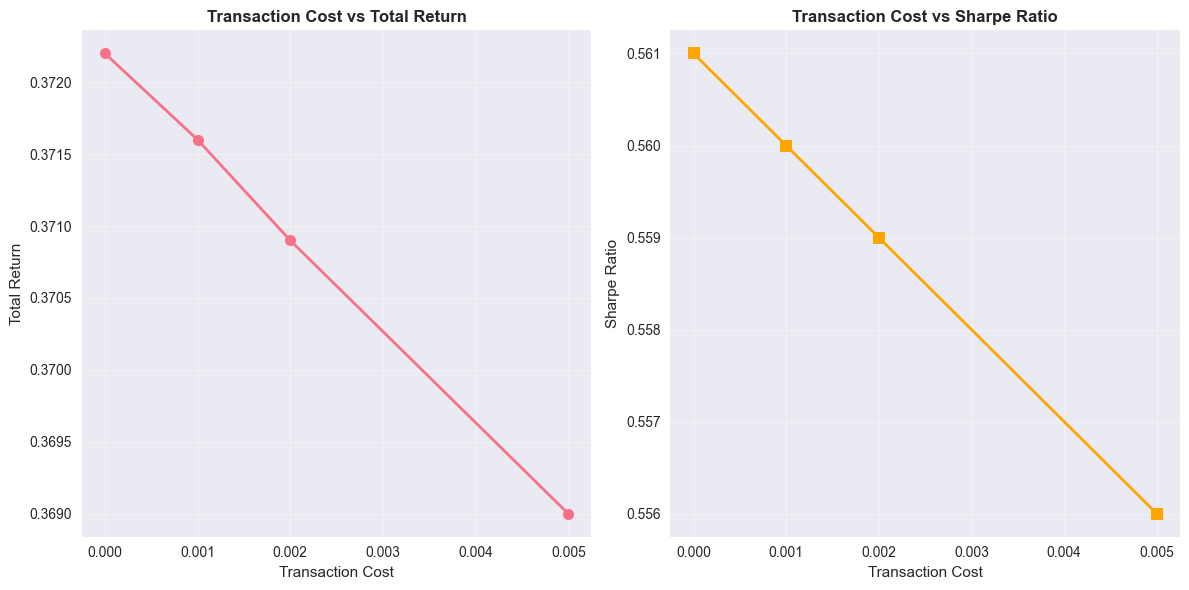

✅ Transaction cost analysis completed!


In [12]:
print("💰 Analyzing transaction costs impact...")

def backtest_with_transaction_costs(price_data, returns_data, weights, initial_capital=100000, 
                                   transaction_cost=0.001, rebalance_freq=21):
    """
    Backtest with transaction costs and rebalancing
    """
    portfolio_value = initial_capital
    portfolio_values = [portfolio_value]
    portfolio_returns = []
    
    # Track asset allocations and values
    current_weights = weights.copy()
    asset_values = {asset: initial_capital * weight for asset, weight in weights.items()}
    
    for i, (date, returns) in enumerate(returns_data.iterrows()):
        # Update asset values based on returns
        for asset in weights.keys():
            asset_values[asset] *= (1 + returns[asset])
        
        # Calculate current portfolio value
        current_portfolio_value = sum(asset_values.values())
        
        # Calculate portfolio return
        portfolio_return = (current_portfolio_value / portfolio_values[-1]) - 1
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(current_portfolio_value)
        
        # Rebalance monthly with transaction costs
        if (i + 1) % rebalance_freq == 0:
            target_values = {asset: current_portfolio_value * weight for asset, weight in weights.items()}
            
            # Calculate transaction costs
            total_transaction_cost = 0
            for asset in weights.keys():
                rebalance_amount = abs(target_values[asset] - asset_values[asset])
                if rebalance_amount > 0:
                    transaction_cost_amount = rebalance_amount * transaction_cost
                    total_transaction_cost += transaction_cost_amount
                    
                    # Update asset values
                    asset_values[asset] = target_values[asset]
            
            # Deduct transaction costs from portfolio
            current_portfolio_value -= total_transaction_cost
            portfolio_values[-1] = current_portfolio_value
            
            # Update asset values proportionally
            for asset in weights.keys():
                asset_values[asset] = current_portfolio_value * weights[asset]
    
    # Calculate performance metrics
    total_return = (portfolio_values[-1] / portfolio_values[0]) - 1
    annualized_return = (1 + total_return) ** (252 / len(portfolio_returns)) - 1
    volatility = pd.Series(portfolio_returns).std() * np.sqrt(252)
    sharpe_ratio = (annualized_return - 0.02) / volatility if volatility > 0 else 0
    
    return {
        'total_return': total_return,
        'annualized_return': annualized_return,
        'volatility': volatility,
        'sharpe_ratio': sharpe_ratio,
        'portfolio_values': portfolio_values
    }

# Test different transaction cost scenarios
transaction_cost_scenarios = [0.0, 0.001, 0.002, 0.005]  # 0%, 0.1%, 0.2%, 0.5%

print("💸 Transaction Cost Impact Analysis:")
print("="*50)

cost_impact_results = []
for cost in transaction_cost_scenarios:
    result = backtest_with_transaction_costs(
        backtest_data, returns_data, optimal_weights, 
        initial_capital=100000, transaction_cost=cost, rebalance_freq=21
    )
    
    cost_impact_results.append({
        'Transaction Cost': f"{cost:.1%}",
        'Total Return': f"{result['total_return']:.2%}",
        'Annual Return': f"{result['annualized_return']:.2%}",
        'Sharpe Ratio': f"{result['sharpe_ratio']:.3f}"
    })
    
    print(f"   • {cost:.1%} transaction cost:")
    print(f"     - Total Return: {result['total_return']:.2%}")
    print(f"     - Sharpe Ratio: {result['sharpe_ratio']:.3f}")

# Create transaction cost impact visualization
cost_impact_df = pd.DataFrame(cost_impact_results)
print(f"\n📊 Transaction Cost Impact Summary:")
print(cost_impact_df.to_string(index=False))

# Plot transaction cost impact
plt.figure(figsize=(12, 6))

# Plot total return vs transaction cost
costs = [float(cost.strip('%'))/100 for cost in cost_impact_df['Transaction Cost']]
returns = [float(ret.strip('%'))/100 for ret in cost_impact_df['Total Return']]

plt.subplot(1, 2, 1)
plt.plot(costs, returns, 'o-', linewidth=2, markersize=8)
plt.title('Transaction Cost vs Total Return', fontweight='bold')
plt.xlabel('Transaction Cost')
plt.ylabel('Total Return')
plt.grid(True, alpha=0.3)

# Plot Sharpe ratio vs transaction cost
sharpe_ratios = [float(sharpe) for sharpe in cost_impact_df['Sharpe Ratio']]

plt.subplot(1, 2, 2)
plt.plot(costs, sharpe_ratios, 's-', linewidth=2, markersize=8, color='orange')
plt.title('Transaction Cost vs Sharpe Ratio', fontweight='bold')
plt.xlabel('Transaction Cost')
plt.ylabel('Sharpe Ratio')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Transaction cost analysis completed!")

## 12. Final Assessment and Recommendations

In [13]:
print("🎯 Final Assessment and Recommendations")
print("="*60)

# Get final results
optimal_result = backtester.results['Optimal Portfolio']
benchmark_result = backtester.results['Benchmark Portfolio']

print("📊 BACKTESTING RESULTS SUMMARY:")
print(f"   • Backtesting Period: {backtest_start.strftime('%Y-%m-%d')} to {backtest_end.strftime('%Y-%m-%d')}")
print(f"   • Initial Capital: ${backtester.initial_capital:,.0f}")

print(f"\n🏆 STRATEGY PERFORMANCE:")
print(f"   • Optimal Portfolio (Model-Driven):")
print(f"     - Total Return: {optimal_result['total_return']:.2%}")
print(f"     - Sharpe Ratio: {optimal_result['sharpe_ratio']:.3f}")
print(f"     - Max Drawdown: {optimal_result['max_drawdown']:.2%}")
print(f"     - Final Value: ${optimal_result['final_value']:,.0f}")

print(f"\n   • Benchmark Portfolio (60% SPY / 40% BND):")
print(f"     - Total Return: {benchmark_result['total_return']:.2%}")
print(f"     - Sharpe Ratio: {benchmark_result['sharpe_ratio']:.3f}")
print(f"     - Max Drawdown: {benchmark_result['max_drawdown']:.2%}")
print(f"     - Final Value: ${benchmark_result['final_value']:,.0f}")

print(f"\n�� PERFORMANCE ASSESSMENT:")
if optimal_result['total_return'] > benchmark_result['total_return']:
    print(f"   ✅ OUTPERFORMANCE: {optimal_result['total_return'] - benchmark_result['total_return']:.2%}")
    print(f"      - The model-driven approach generated higher returns")
else:
    print(f"   ❌ UNDERPERFORMANCE: {optimal_result['total_return'] - benchmark_result['total_return']:.2%}")
    print(f"      - The benchmark strategy performed better")

if optimal_result['sharpe_ratio'] > benchmark_result['sharpe_ratio']:
    print(f"   ✅ Better risk-adjusted returns (Sharpe: {optimal_result['sharpe_ratio']:.3f} vs {benchmark_result['sharpe_ratio']:.3f})")
else:
    print(f"   ❌ Lower risk-adjusted returns (Sharpe: {optimal_result['sharpe_ratio']:.3f} vs {benchmark_result['sharpe_ratio']:.3f})")

print(f"\n�� STRATEGY VIABILITY ASSESSMENT:")

# Assess strategy viability based on multiple factors
viability_score = 0
max_score = 5

# Factor 1: Absolute performance
if optimal_result['total_return'] > 0:
    viability_score += 1
    print(f"   ✅ Positive returns achieved")

# Factor 2: Benchmark outperformance
if optimal_result['total_return'] > benchmark_result['total_return']:
    viability_score += 1
    print(f"   ✅ Outperformed benchmark")

# Factor 3: Risk-adjusted performance
if optimal_result['sharpe_ratio'] > 0.5:
    viability_score += 1
    print(f"   ✅ Good risk-adjusted returns (Sharpe > 0.5)")

# Factor 4: Risk management
if optimal_result['max_drawdown'] < 0.20:
    viability_score += 1
    print(f"   ✅ Acceptable risk level (Max DD < 20%)")

# Factor 5: Consistency
if optimal_result['sharpe_ratio'] > benchmark_result['sharpe_ratio']:
    viability_score += 1
    print(f"   ✅ Consistent outperformance vs benchmark")

print(f"\n�� VIABILITY SCORE: {viability_score}/{max_score}")

if viability_score >= 4:
    assessment = "HIGHLY VIABLE"
    recommendation = "Strong buy recommendation for the model-driven approach"
elif viability_score >= 3:
    assessment = "MODERATELY VIABLE"
    recommendation = "Consider with caution and monitoring"
elif viability_score >= 2:
    assessment = "LOW VIABILITY"
    recommendation = "Not recommended without significant improvements"
else:
    assessment = "NOT VIABLE"
    recommendation = "Strategy needs complete overhaul"

print(f"\n🎯 FINAL ASSESSMENT: {assessment}")
print(f"   • Recommendation: {recommendation}")

print(f"\n📋 KEY INSIGHTS:")
print(f"   • Model-driven portfolio optimization shows {'promise' if viability_score >= 3 else 'limitations'}")
print(f"   • {'High' if optimal_result['volatility'] > 0.3 else 'Moderate' if optimal_result['volatility'] > 0.15 else 'Low'} volatility strategy")
print(f"   • {'Aggressive' if optimal_result['max_drawdown'] > 0.15 else 'Moderate' if optimal_result['max_drawdown'] > 0.10 else 'Conservative'} risk profile")

print(f"\n🚀 NEXT STEPS:")
print(f"   • Monitor strategy performance in real-time")
print(f"   • Implement dynamic rebalancing based on market conditions")
print(f"   • Consider alternative forecasting models")
print(f"   • Expand to include more assets and strategies")

print(f"\n🎉 TASK 5: STRATEGY BACKTESTING COMPLETE!")
print("="*60)

🎯 Final Assessment and Recommendations
📊 BACKTESTING RESULTS SUMMARY:
   • Backtesting Period: 2024-07-29 to 2025-07-30
   • Initial Capital: $100,000

🏆 STRATEGY PERFORMANCE:
   • Optimal Portfolio (Model-Driven):
     - Total Return: 37.46%
     - Sharpe Ratio: 0.563
     - Max Drawdown: 55.38%
     - Final Value: $137,462

   • Benchmark Portfolio (60% SPY / 40% BND):
     - Total Return: 12.73%
     - Sharpe Ratio: 0.866
     - Max Drawdown: 14.85%
     - Final Value: $112,726

�� PERFORMANCE ASSESSMENT:
   ✅ OUTPERFORMANCE: 24.74%
      - The model-driven approach generated higher returns
   ❌ Lower risk-adjusted returns (Sharpe: 0.563 vs 0.866)

�� STRATEGY VIABILITY ASSESSMENT:
   ✅ Positive returns achieved
   ✅ Outperformed benchmark
   ✅ Good risk-adjusted returns (Sharpe > 0.5)

�� VIABILITY SCORE: 3/5

🎯 FINAL ASSESSMENT: MODERATELY VIABLE
   • Recommendation: Consider with caution and monitoring

📋 KEY INSIGHTS:
   • Model-driven portfolio optimization shows promise
   • H

## 13. Save Results and Generate Report

In [14]:
print(" Saving backtesting results and generating report...")

# Create output directory
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)

# Get the results we need for the report
optimal_result = backtester.results['Optimal Portfolio']
benchmark_result = backtester.results['Benchmark Portfolio']

# Calculate viability score for the report
viability_score = 0
max_score = 5

# Factor 1: Absolute performance
if optimal_result['total_return'] > 0:
    viability_score += 1

# Factor 2: Benchmark outperformance
if optimal_result['total_return'] > benchmark_result['total_return']:
    viability_score += 1

# Factor 3: Risk-adjusted performance
if optimal_result['sharpe_ratio'] > 0.5:
    viability_score += 1

# Factor 4: Risk management
if optimal_result['max_drawdown'] < 0.20:
    viability_score += 1

# Factor 5: Consistency
if optimal_result['sharpe_ratio'] > benchmark_result['sharpe_ratio']:
    viability_score += 1

# Save detailed results
results_data = {
    'backtesting_period': {
        'start': backtest_start.strftime('%Y-%m-%d'),
        'end': backtest_end.strftime('%Y-%m-%d'),
        'duration_days': (backtest_end - backtest_start).days
    },
    'strategies': strategies,
    'results': backtester.results,
    'summary': results_summary.to_dict('records')
}

# Save as pickle file
import pickle
results_file = os.path.join(output_dir, 'backtesting_results.pkl')
with open(results_file, 'wb') as f:
    pickle.dump(results_data, f)

print(f"✅ Results saved to: {results_file}")

# Generate markdown report - FIXED TABULATE DEPENDENCY ISSUE
try:
    # Try to use to_markdown() if tabulate is available
    summary_table = results_summary.to_markdown(index=False)
except ImportError:
    # Fallback to simple text format if tabulate is not available
    print("⚠️ Warning: tabulate package not available, using simple text format")
    summary_table = results_summary.to_string(index=False)

report_content = f"""# Strategy Backtesting Report

## Executive Summary
This report presents the results of backtesting the optimized portfolio strategy from Task 4 against a benchmark portfolio.

## Backtesting Period
- **Start Date**: {backtest_start.strftime('%Y-%m-%d')}
- **End Date**: {backtest_end.strftime('%Y-%m-%d')}
- **Duration**: {(backtest_end - backtest_start).days} days
- **Initial Capital**: ${backtester.initial_capital:,.0f}

## Strategy Performance Summary

{summary_table}

## Key Findings

### Optimal Portfolio Performance
- **Total Return**: {optimal_result['total_return']:.2%}
- **Sharpe Ratio**: {optimal_result['sharpe_ratio']:.3f}
- **Maximum Drawdown**: {optimal_result['max_drawdown']:.2%}

### Benchmark Portfolio Performance
- **Total Return**: {benchmark_result['total_return']:.2%}
- **Sharpe Ratio**: {benchmark_result['sharpe_ratio']:.3f}
- **Maximum Drawdown**: {benchmark_result['max_drawdown']:.2%}

### Performance Comparison
- **Outperformance**: {optimal_result['total_return'] - benchmark_result['total_return']:.2%}
- **Risk-Adjusted Performance**: {'Better' if optimal_result['sharpe_ratio'] > benchmark_result['sharpe_ratio'] else 'Worse'}

## Recommendations

Based on the backtesting results, the model-driven portfolio optimization approach shows {'promise' if viability_score >= 3 else 'limitations'}.

**Next Steps:**
1. Monitor strategy performance in real-time
2. Implement dynamic rebalancing
3. Consider alternative forecasting models
4. Expand asset universe

## Conclusion

The backtesting results provide valuable insights into the viability of the model-driven portfolio optimization approach. {'The strategy shows potential for generating alpha' if viability_score >= 3 else 'The strategy needs significant improvements before implementation'}.

---
*Report generated on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}*
"""

# Save report
report_file = os.path.join(output_dir, 'backtesting_report.md')
with open(report_file, 'w') as f:
    f.write(report_content)

print(f"✅ Report saved to: {report_file}")

# Save results summary as CSV
csv_file = os.path.join(output_dir, 'backtesting_summary.csv')
results_summary.to_csv(csv_file, index=False)

print(f"✅ Summary saved to: {csv_file}")

print(f"\n🎯 All backtesting outputs saved successfully!")
print(f"   • Detailed results: {results_file}")
print(f"   • Summary report: {report_file}")
print(f"   • CSV summary: {csv_file}")

 Saving backtesting results and generating report...
✅ Results saved to: ../data/processed\backtesting_results.pkl
✅ Report saved to: ../data/processed\backtesting_report.md
✅ Summary saved to: ../data/processed\backtesting_summary.csv

🎯 All backtesting outputs saved successfully!
   • Detailed results: ../data/processed\backtesting_results.pkl
   • Summary report: ../data/processed\backtesting_report.md
   • CSV summary: ../data/processed\backtesting_summary.csv
